# Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import random

import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import RepeatVector
from keras.layers import TimeDistributed

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import auc, accuracy_score, confusion_matrix, mean_squared_error
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV, train_test_split
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from datetime import datetime
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings('ignore')

In [ ]:
trials_all1 = []
classes_all1 = []
trials_all2 = []
classes_all2 = []
trials_all3 = []
classes_all3 = []
trials_all4 = []
classes_all4 = []
trials_all5 = []
classes_all5 = []

# Loop Over Objects (A01T-A09T)

In [ ]:
path = '/content/drive/MyDrive/EEG/Data/A09T.npz'

In [ ]:

class MotorImageryDataset:
    def __init__(self, dataset=path):
        if not dataset.endswith('.npz'):
            dataset += '.npz'

        self.data = np.load(dataset)

        self.Fs = 250  # 250Hz from original paper

        # keys of data ['s', 'etyp', 'epos', 'edur', 'artifacts']

        self.raw = self.data['s'].T
        self.events_type = self.data['etyp'].T
        self.events_position = self.data['epos'].T
        self.events_duration = self.data['edur'].T
        self.artifacts = self.data['artifacts'].T

        # Types of motor imagery
        self.mi_types = {769: 'left', 770: 'right',
                         771: 'foot', 772: 'tongue', 783: 'unknown'}

    def get_trials_from_channel(self, channel=7):

        # Channel default is C3

        startrial_code = 768
        starttrial_events = self.events_type == startrial_code
        idxs = [i for i, x in enumerate(starttrial_events[0]) if x]

        trials = []
        classes = []

        for index in idxs:
            try:
                type_e = self.events_type[0, index+1]
                class_e = self.mi_types[type_e]
                classes.append(class_e)

                start = self.events_position[0, index]
                stop = start + self.events_duration[0, index]
                trial = self.raw[channel, start:stop]
                trial = trial.reshape((1, -1))
                trials.append(trial)

            except:
                continue

        return trials, classes

    def get_trials_from_channels(self, channels=[7, 9, 11]):
        trials_c = []
        classes_c = []
        for c in channels:
            t, c = self.get_trials_from_channel(channel=c)

            tt = np.concatenate(t, axis=0)
            trials_c.append(tt)
            classes_c.append(c)

        return trials_c, classes_c

In [ ]:
datasetA1 = MotorImageryDataset(path)
trials, classes = datasetA1.get_trials_from_channels([7, 9, 11])

In [ ]:
for trial in trials[0]:
  trials_all1.append(trial)
for clas in classes[0]:
  classes_all1.append(clas)

for trial in trials[1]:
  trials_all2.append(trial)
for clas in classes[1]:
  classes_all2.append(clas)

for trial in trials[2]:
  trials_all3.append(trial)
for clas in classes[2]:
  classes_all3.append(clas)


In [ ]:
len(classes_all3)

0

In [ ]:
np.array(trials_all1).shape

(0,)

# Save Data

In [ ]:
trials_all1_df = pd.DataFrame(trials_all1)
trials_all2_df = pd.DataFrame(trials_all2)
trials_all3_df = pd.DataFrame(trials_all3)


classes_all1_df = pd.DataFrame(classes_all1)
classes_all2_df = pd.DataFrame(classes_all2)
classes_all3_df = pd.DataFrame(classes_all3)

In [ ]:
trials_all1_df.to_csv('/content/drive/My Drive/EEG/Data/trials_all1_df.csv', encoding='utf-8')
trials_all2_df.to_csv('/content/drive/My Drive/EEG/Data/trials_all2_df.csv', encoding='utf-8')
trials_all3_df.to_csv('/content/drive/My Drive/EEG/Data/trials_all3_df.csv', encoding='utf-8')


classes_all1_df.to_csv('/content/drive/My Drive/EEG/Data/classes_all1_df.csv', encoding='utf-8')
classes_all2_df.to_csv('/content/drive/My Drive/EEG/Data/classes_all2_df.csv', encoding='utf-8')
classes_all3_df.to_csv('/content/drive/My Drive/EEG/Data/classes_all3_df.csv', encoding='utf-8')

# Load Data

In [ ]:
trials1_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/trials_all1_df.csv')
trials1_pd.drop(["Unnamed: 0"], axis=1,inplace=True)

classes1_df = pd.read_csv('/content/drive/My Drive/EEG/Data/classes_all1_df.csv')
classes1_df.drop(["Unnamed: 0"], axis=1,inplace=True)
trials2_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/trials_all2_df.csv')
trials2_pd.drop(["Unnamed: 0"], axis=1,inplace=True)

classes2_df = pd.read_csv('/content/drive/My Drive/EEG/Data/classes_all2_df.csv')
classes2_df.drop(["Unnamed: 0"], axis=1,inplace=True)
trials3_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/trials_all3_df.csv')
trials3_pd.drop(["Unnamed: 0"], axis=1,inplace=True)

classes3_df = pd.read_csv('/content/drive/My Drive/EEG/Data/classes_all3_df.csv')
classes3_df.drop(["Unnamed: 0"], axis=1,inplace=True)

In [ ]:
# Merging 
trials = pd.concat([trials1_pd, trials2_pd, trials3_pd], axis=0)
classes = pd.concat([classes1_df, classes2_df, classes3_df], axis=0)

In [ ]:
trials.shape

(6984, 1875)

In [ ]:
classes

,0
0,right
1,right
2,tongue
3,foot
4,right
...,...
2323,foot
2324,tongue
2325,foot
2326,left


# Preprocessing

In [ ]:
# Check for Duplication
print(trials.duplicated().value_counts())

False    6984
dtype: int64


In [ ]:
# Balance Check
classes.value_counts()

0     
right     1773
tongue    1773
foot      1722
left      1716
dtype: int64

# Label Mapping and Split

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import multilabel_confusion_matrix

In [ ]:
label_mapping = {'left': 0,'right': 1,'foot': 2, 'tongue': 3}

In [ ]:
y = classes
y = y.replace(label_mapping)

In [ ]:
x = trials

In [ ]:
x_numpy = np.array(x)
y_numpy = np.array(y)

In [ ]:
x_numpy.shape

(6984, 1875)

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(x_numpy,y_numpy,train_size = 0.8)

In [ ]:
xtrain.shape

(5587, 1875)

# Save

In [ ]:
xtrain_pd = pd.DataFrame(xtrain)
xtest_pd = pd.DataFrame(xtest)
ytrain_pd = pd.DataFrame(ytrain)
ytest_pd = pd.DataFrame(ytest)

In [ ]:
xtrain_pd.to_csv('/content/drive/My Drive/EEG/Data/xtrain.csv', encoding='utf-8')
xtest_pd.to_csv('/content/drive/My Drive/EEG/Data/xtest.csv', encoding='utf-8')
ytrain_pd.to_csv('/content/drive/My Drive/EEG/Data/ytrain.csv', encoding='utf-8')
ytest_pd.to_csv('/content/drive/My Drive/EEG/Data/ytest.csv', encoding='utf-8')

# Load

In [ ]:
xtrain_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/xtrain.csv')
xtrain_pd.drop(["Unnamed: 0"], axis=1,inplace=True)
xtrain = np.array(xtrain_pd)

xtest_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/xtest.csv')
xtest_pd.drop(["Unnamed: 0"], axis=1,inplace=True)
xtest = np.array(xtest_pd)

ytrain_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/ytrain.csv')
ytrain_pd.drop(["Unnamed: 0"], axis=1,inplace=True)
ytrain = np.array(ytrain_pd)

ytest_pd = pd.read_csv('/content/drive/My Drive/EEG/Data/ytest.csv')
ytest_pd.drop(["Unnamed: 0"], axis=1,inplace=True)
ytest = np.array(ytest_pd)

# Feature Extraction with LSTM

In [ ]:
extended_train = []
for trial in xtrain:
  extended_train.append([trial])
xtrain1 = np.array(extended_train)
xtrain1.shape

(5587, 1, 1875)

In [ ]:
extended_test = []
for trial in xtest:
  extended_test.append([trial])
xtest1 = np.array(extended_test)
xtest1.shape

(1397, 1, 1875)

In [ ]:
ex_data = np.concatenate((extended_train, extended_test), axis=0)

In [ ]:
ex_data.shape

(6984, 1, 1875)

In [ ]:
timesteps = 1
n_features = 1875

In [ ]:
# This is the dimension of the original space
input_dim = 1875


encoder = Sequential([
    LSTM(1024, activation='selu', input_shape=(timesteps,n_features), return_sequences=False),
    RepeatVector(timesteps)
])

decoder = Sequential([
    LSTM(1024, activation='selu', input_shape=(1,1024),return_sequences=True),
    TimeDistributed(Dense(n_features))
])

In [ ]:
len(ex_data)

6984

In [ ]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mean_absolute_error', optimizer='adam')

In [ ]:
model_history = autoencoder.fit(ex_data, ex_data, epochs=100, batch_size=128, verbose=0)

Text(0.5, 0, 'Epoch')

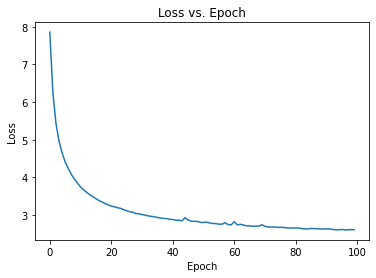

In [ ]:
plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch") 

In [ ]:
encoded_x_train = encoder(xtrain1)
encoded_x_train.shape

TensorShape([5587, 1, 1024])

In [ ]:
encoded_x_test = encoder(xtest1)    

# Hyperparameter tuning with Grid Search

In [ ]:
en_train_list = []
for item in encoded_x_train:
  en_train_list.append(item[0])
en_train = np.array(en_train_list)

In [ ]:
en_test_list = []
for item in encoded_x_test:
  en_test_list.append(item[0])
en_test = np.array(en_test_list)

In [ ]:
y_n = np.array(ytest)
ytl = []
for l in y_n:
  ytl.append(l[0])
y_num_test = np.array(ytl)
y_num_test

array([2, 0, 2, ..., 1, 1, 3])

In [ ]:
# A parameter grid for XGBoost
params = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }

In [ ]:
xgb = XGBClassifier(n_estimators=600, objective='multi:softprob',
                    silent=True, nthread=1)

In [ ]:
folds = 3
param_comb = 5

skf = StratifiedKFold(n_splits=folds, shuffle = True, random_state = 42)

random_search = RandomizedSearchCV(xgb, param_distributions=params, n_iter=param_comb, scoring='roc_auc', n_jobs=4, cv=skf.split(en_train, ytrain), verbose=3, random_state=42 )

random_search.fit(en_train, ytrain)

In [ ]:
print('\n Best estimator:')
print(random_search.best_estimator_) 

# XGboost

In [ ]:
xgb_model = XGBClassifier(colsample_bytree=0.6, gamma=1.5, max_depth=4, min_child_weight=10,
              n_estimators=600, nthread=1, objective='multi:softprob',
              silent=True, subsample=0.8)
xgb_model.fit(en_train, ytrain)

y_pred = xgb_model.predict(en_test)

In [ ]:
xgb_acc = accuracy_score(y_num_test, y_pred)

In [ ]:
print(accuracy_score(y_num_test, y_pred))

0.8174659985683608


In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]
model = SVC()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(en_train, ytrain)
print(grid)
# summarize the results of the grid search
print(grid.best_score_)
print(grid.best_estimator_)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}])
0.6441698710608372
SVC(C=10, gamma=0.0001)


In [ ]:
svm = SVC(C = 10,gamma = 0.0001)
svm.fit(en_train,ytrain)
svm_pre = svm.predict(en_test)

In [ ]:
svm_acc = accuracy_score(y_num_test,svm_pre)
print (accuracy_score(y_num_test,svm_pre))

0.7115246957766643


In [ ]:
dt = DecisionTreeClassifier()
dt.fit(en_train,ytrain)
dt_pre = dt.predict(en_test)
print (accuracy_score(y_num_test,dt_pre))
dt_acc = accuracy_score(y_num_test,dt_pre)

0.4266284896206156


In [ ]:
ex = ExtraTreeClassifier()
ex.fit(en_train,ytrain)
ex_pre = ex.predict(en_test)
print (accuracy_score(y_num_test,ex_pre))
ex_acc = accuracy_score(y_num_test,ex_pre)

0.4330708661417323


In [ ]:
rf = RandomForestClassifier()
rf.fit(en_train,ytrain)
rf_pre = rf.predict(en_test)
print (accuracy_score(y_num_test,rf_pre))
rf_acc = accuracy_score(y_num_test,rf_pre)

0.8017179670722978


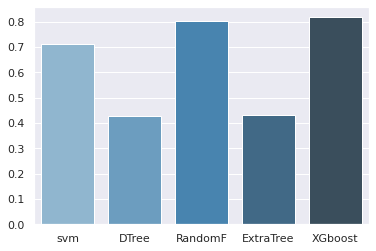

In [ ]:
sns.set(font_scale = 1)
ax = sns.barplot(x=["svm",'DTree','RandomF','ExtraTree','XGboost'],
                 y = [svm_acc,dt_acc,rf_acc,ex_acc,xgb_acc],palette="Blues_d")